<a href="https://colab.research.google.com/github/abyasingh/GGH_Ideathon/blob/main/Water_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express          as ex
import plotly.graph_objs       as go
import plotly.offline          as pyo
import scipy.stats             as stats
from scipy.stats import norm, boxcox
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
from scipy import stats
from tqdm import tqdm_notebook

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, r2_score, accuracy_score
from sklearn.model_selection import (GridSearchCV, KFold, train_test_split, cross_val_score)

from imblearn.over_sampling import SMOTE
from collections import Counter

from xgboost.sklearn import XGBClassifier

In [ ]:
data = pd.read_csv('/content/water_pollution_data.csv')

In [ ]:
print(data)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [ ]:
data.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

<Axes: title={'center': 'Missing Values'}>

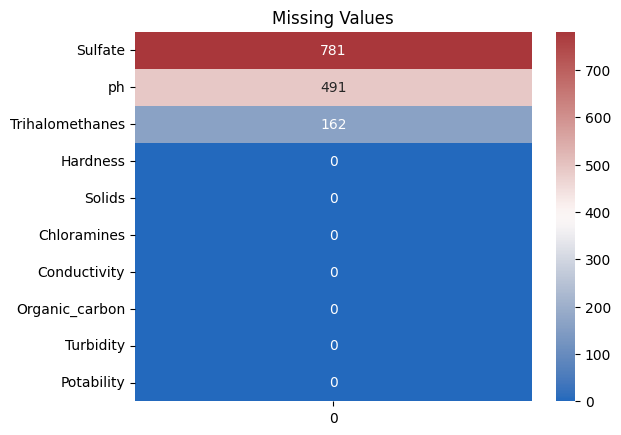

In [ ]:
plt.title('Missing Values')
nans = data.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [ ]:
data[data['Sulfate'].isnull()]
data[data['ph'].isnull()]
data[data['Trihalomethanes'].isnull()]

ph    Hardness        Solids  Chloramines     Sulfate  \
62         NaN  229.485694  35729.692709     8.810843  384.943779   
81    5.519126  168.728583  12531.601921     7.730723         NaN   
110   9.286155  222.661551  12311.268366     7.289866  332.239359   
118   7.397413  122.541040   8855.114121     6.888689  241.607532   
119   7.812804  196.583886  42550.841816     7.334648         NaN   
...        ...         ...           ...          ...         ...   
3174  6.698154  198.286268  34675.862845     6.263602  360.232834   
3185  6.110022  234.800957  16663.539074     5.984536  348.055211   
3219  6.417716  209.702425  31974.481631     7.263425  321.382124   
3259  9.271355  181.259617  16540.979048     7.022499  309.238865   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
62      296.397547       16.927092              NaN   3.855602           0  
81      443.570372       18.099078              NaN   3.758996           0  
110     353.740100       14.171763              NaN   5.239982           0  
118     489.851600       13.365906              NaN   3.149158           0  
119     442.545775       14.666917              NaN   6.204846           0  
...            ...             ...              ...        ...         ...  
3174    430.935009       12.176678              NaN   3.758180           1  
3185    437.892115       10.059523              NaN   2.817780           1  
3219    289.450118       11.369071              NaN   4.210327           1  
3259    487.692788       13.228441              NaN   4.333953           1  
3272    392.449580       19.903225              NaN   2.798243           1  

[162 rows x 10 columns]

In [ ]:
phMean_0 = data[data['Potability'] == 0]['ph'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['ph'].isna()), 'ph'] = phMean_0
phMean_1 = data[data['Potability'] == 1]['ph'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['ph'].isna()), 'ph'] = phMean_1

SulfateMean_0 = data[data['Potability'] == 0]['Sulfate'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['Sulfate'].isna()), 'Sulfate'] = SulfateMean_0
SulfateMean_1 = data[data['Potability'] == 1]['Sulfate'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Sulfate'].isna()), 'Sulfate'] = SulfateMean_1

TrihalomethanesMean_0 = data[data['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_0
TrihalomethanesMean_1 = data[data['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_1

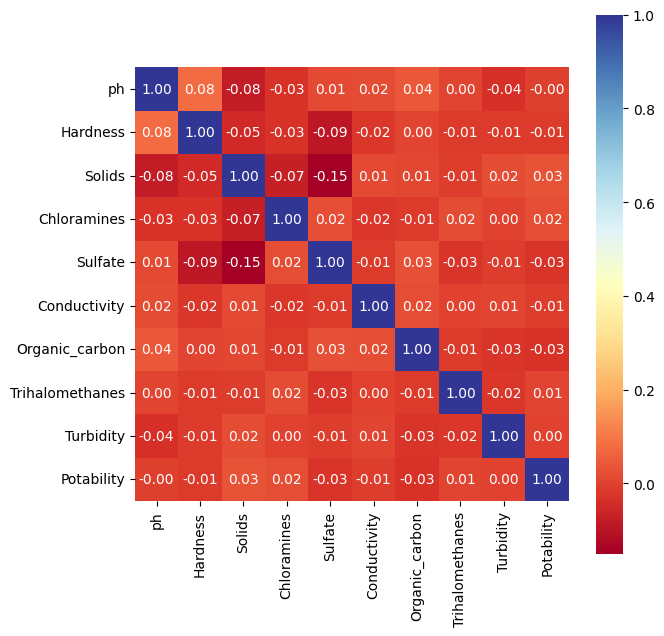

In [ ]:
Corrmat = data.corr()
plt.subplots(figsize=(7,7))
sns.heatmap(Corrmat, cmap="RdYlBu", square = True, annot=True, fmt='.2f')
plt.show()

<Axes: xlabel='Potability', ylabel='ph'>

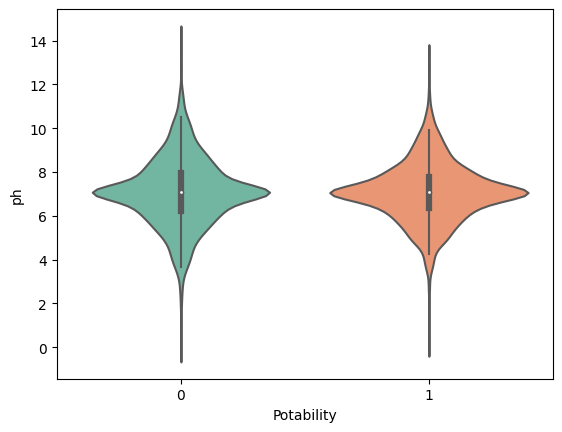

In [ ]:
sns.violinplot(x='Potability', y='ph', data=data, palette='Set2')

Boxplot and density distribution of different features by Potability



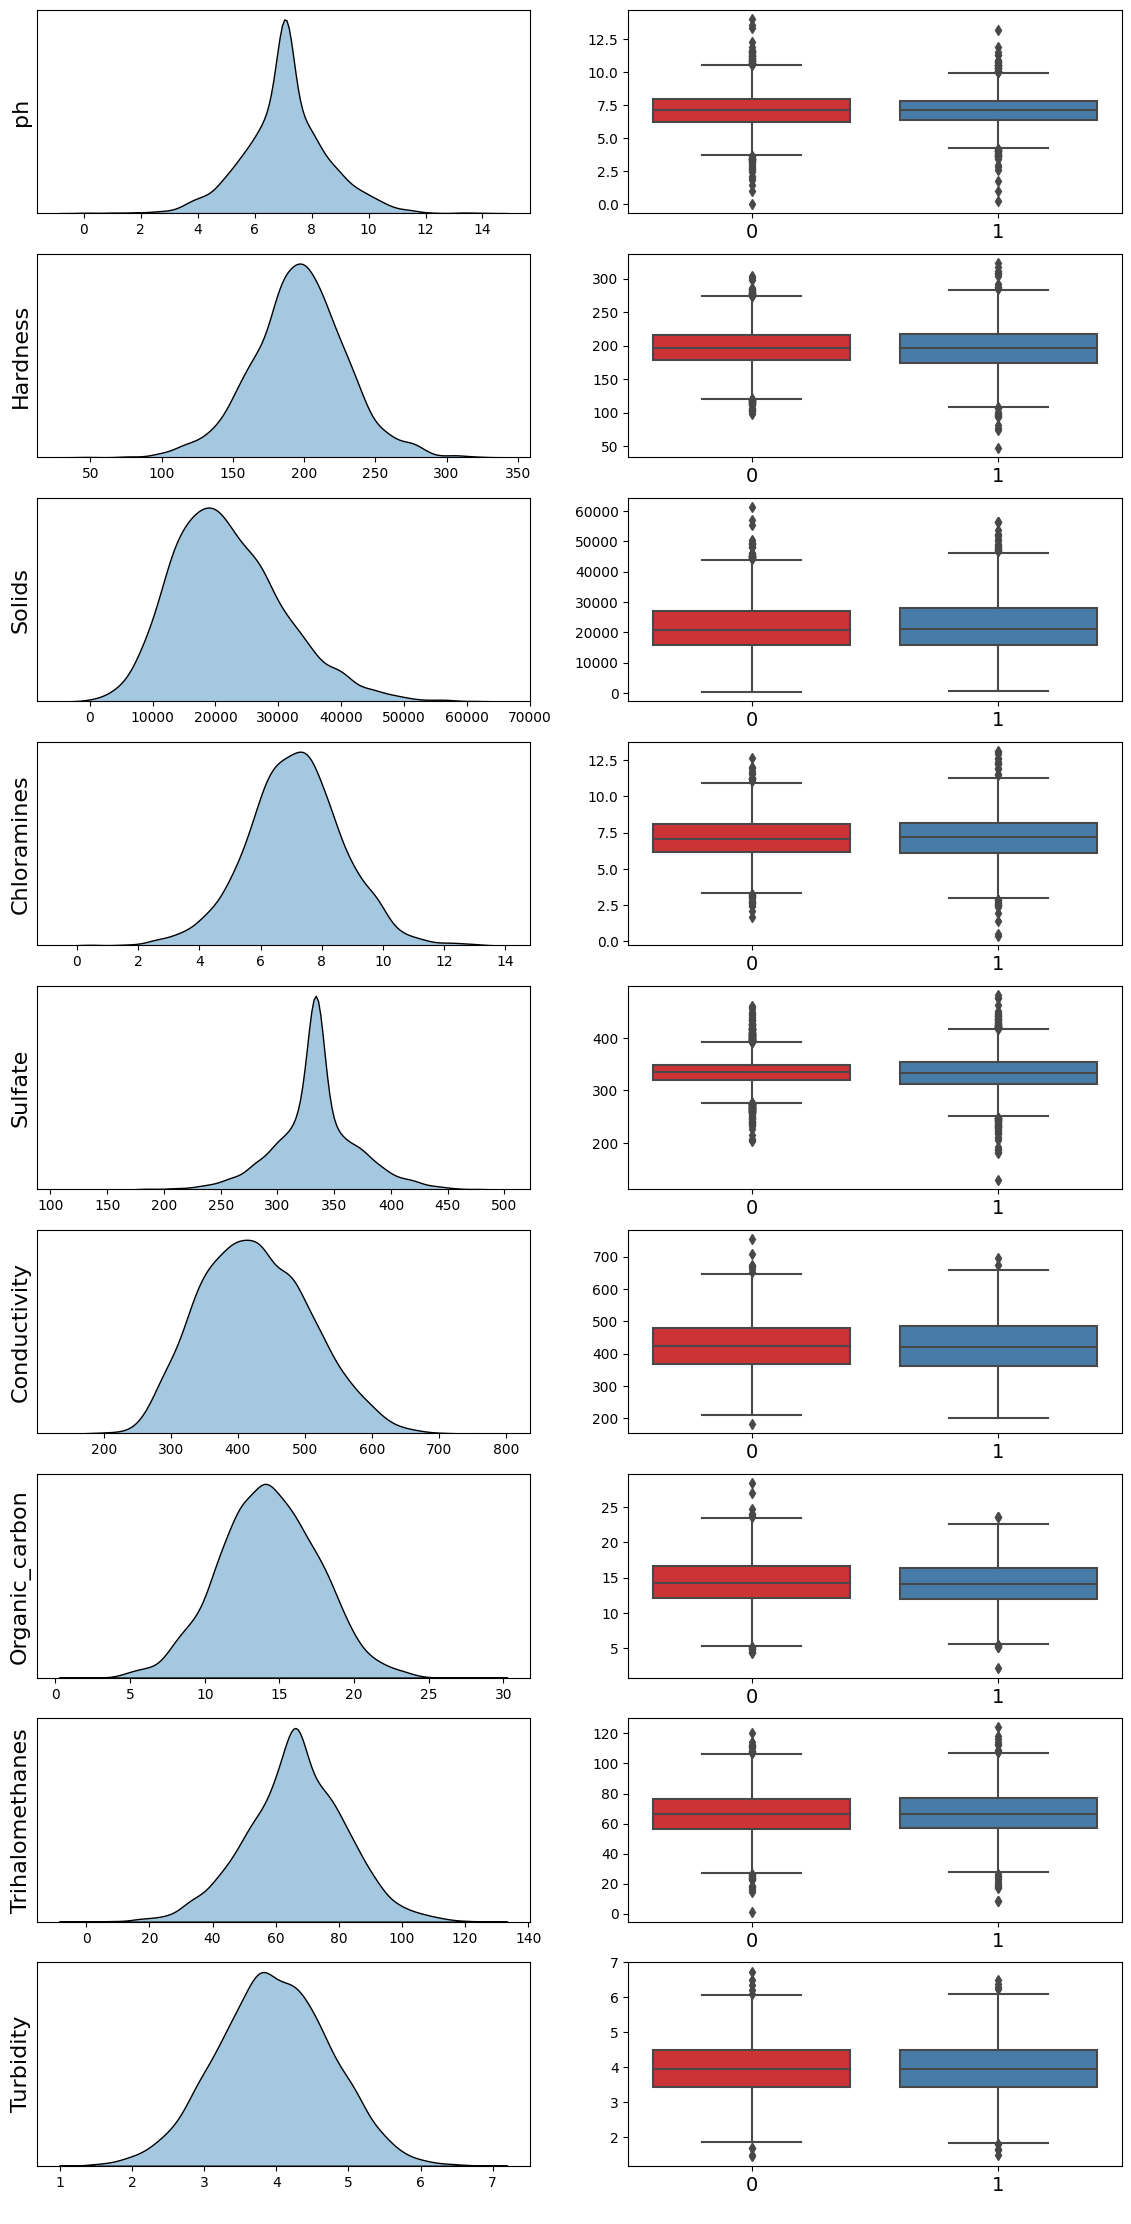

In [ ]:
print('Boxplot and density distribution of different features by Potability\n')

fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(14, 28))

features = list(data.columns.drop('Potability'))
i=0
for cols in features:
    sns.kdeplot(data[cols], fill=True, alpha=0.4, multiple='stack', ax=ax[i,0])

    sns.boxplot(data= data, y=cols, x='Potability', ax=ax[i, 1],
               palette=('Set1'))
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    ax[i,0].tick_params(left=False, labelleft=False)
    ax[i,0].set_ylabel(cols, fontsize=16)
    i=i+1

plt.show()

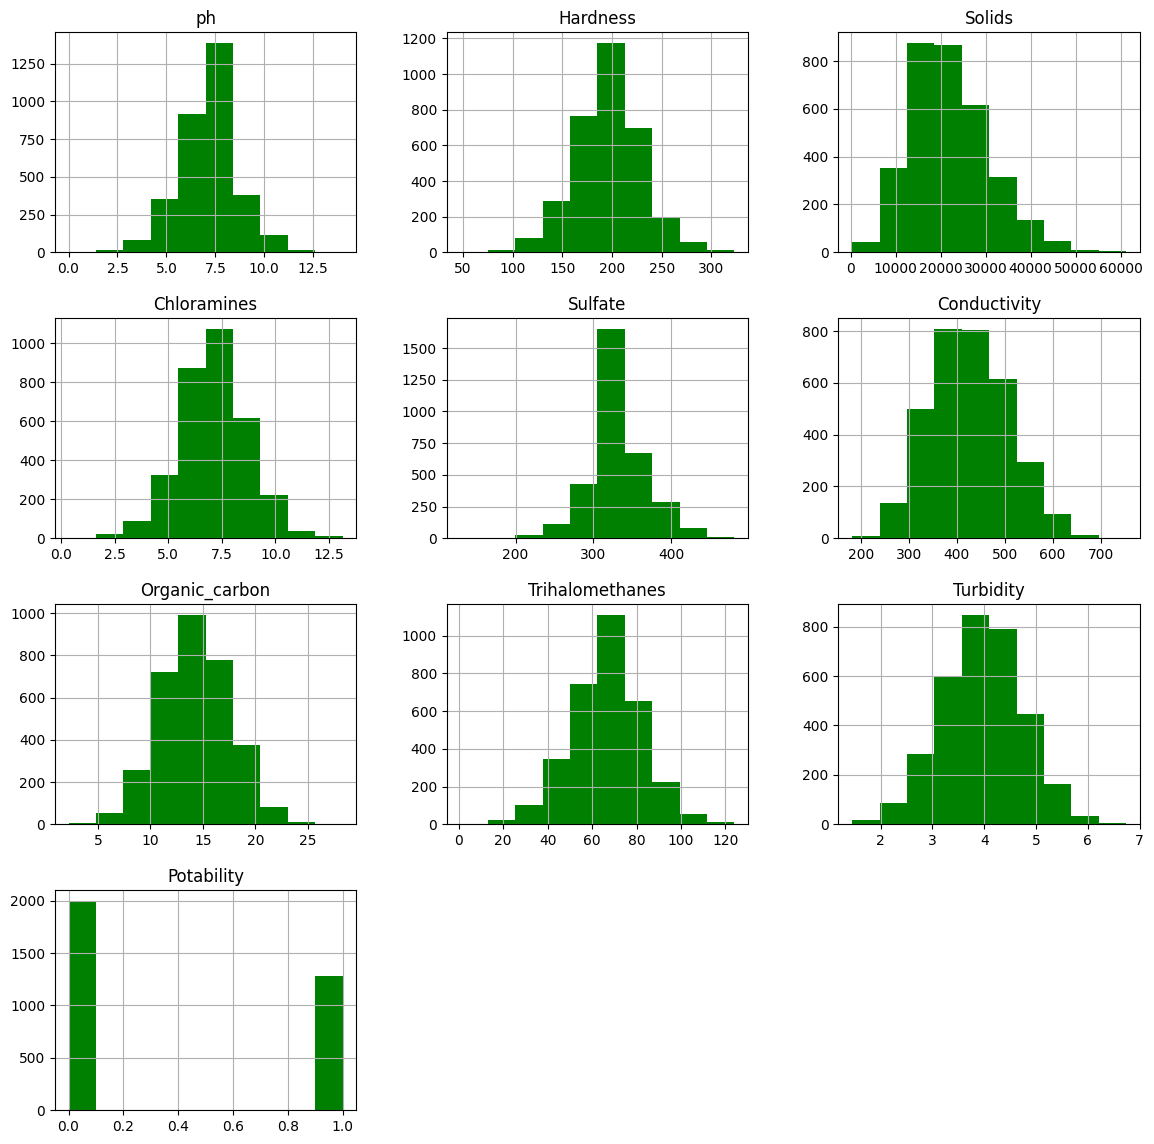

In [ ]:
data.hist(figsize=(14,14), color='green')
plt.show()

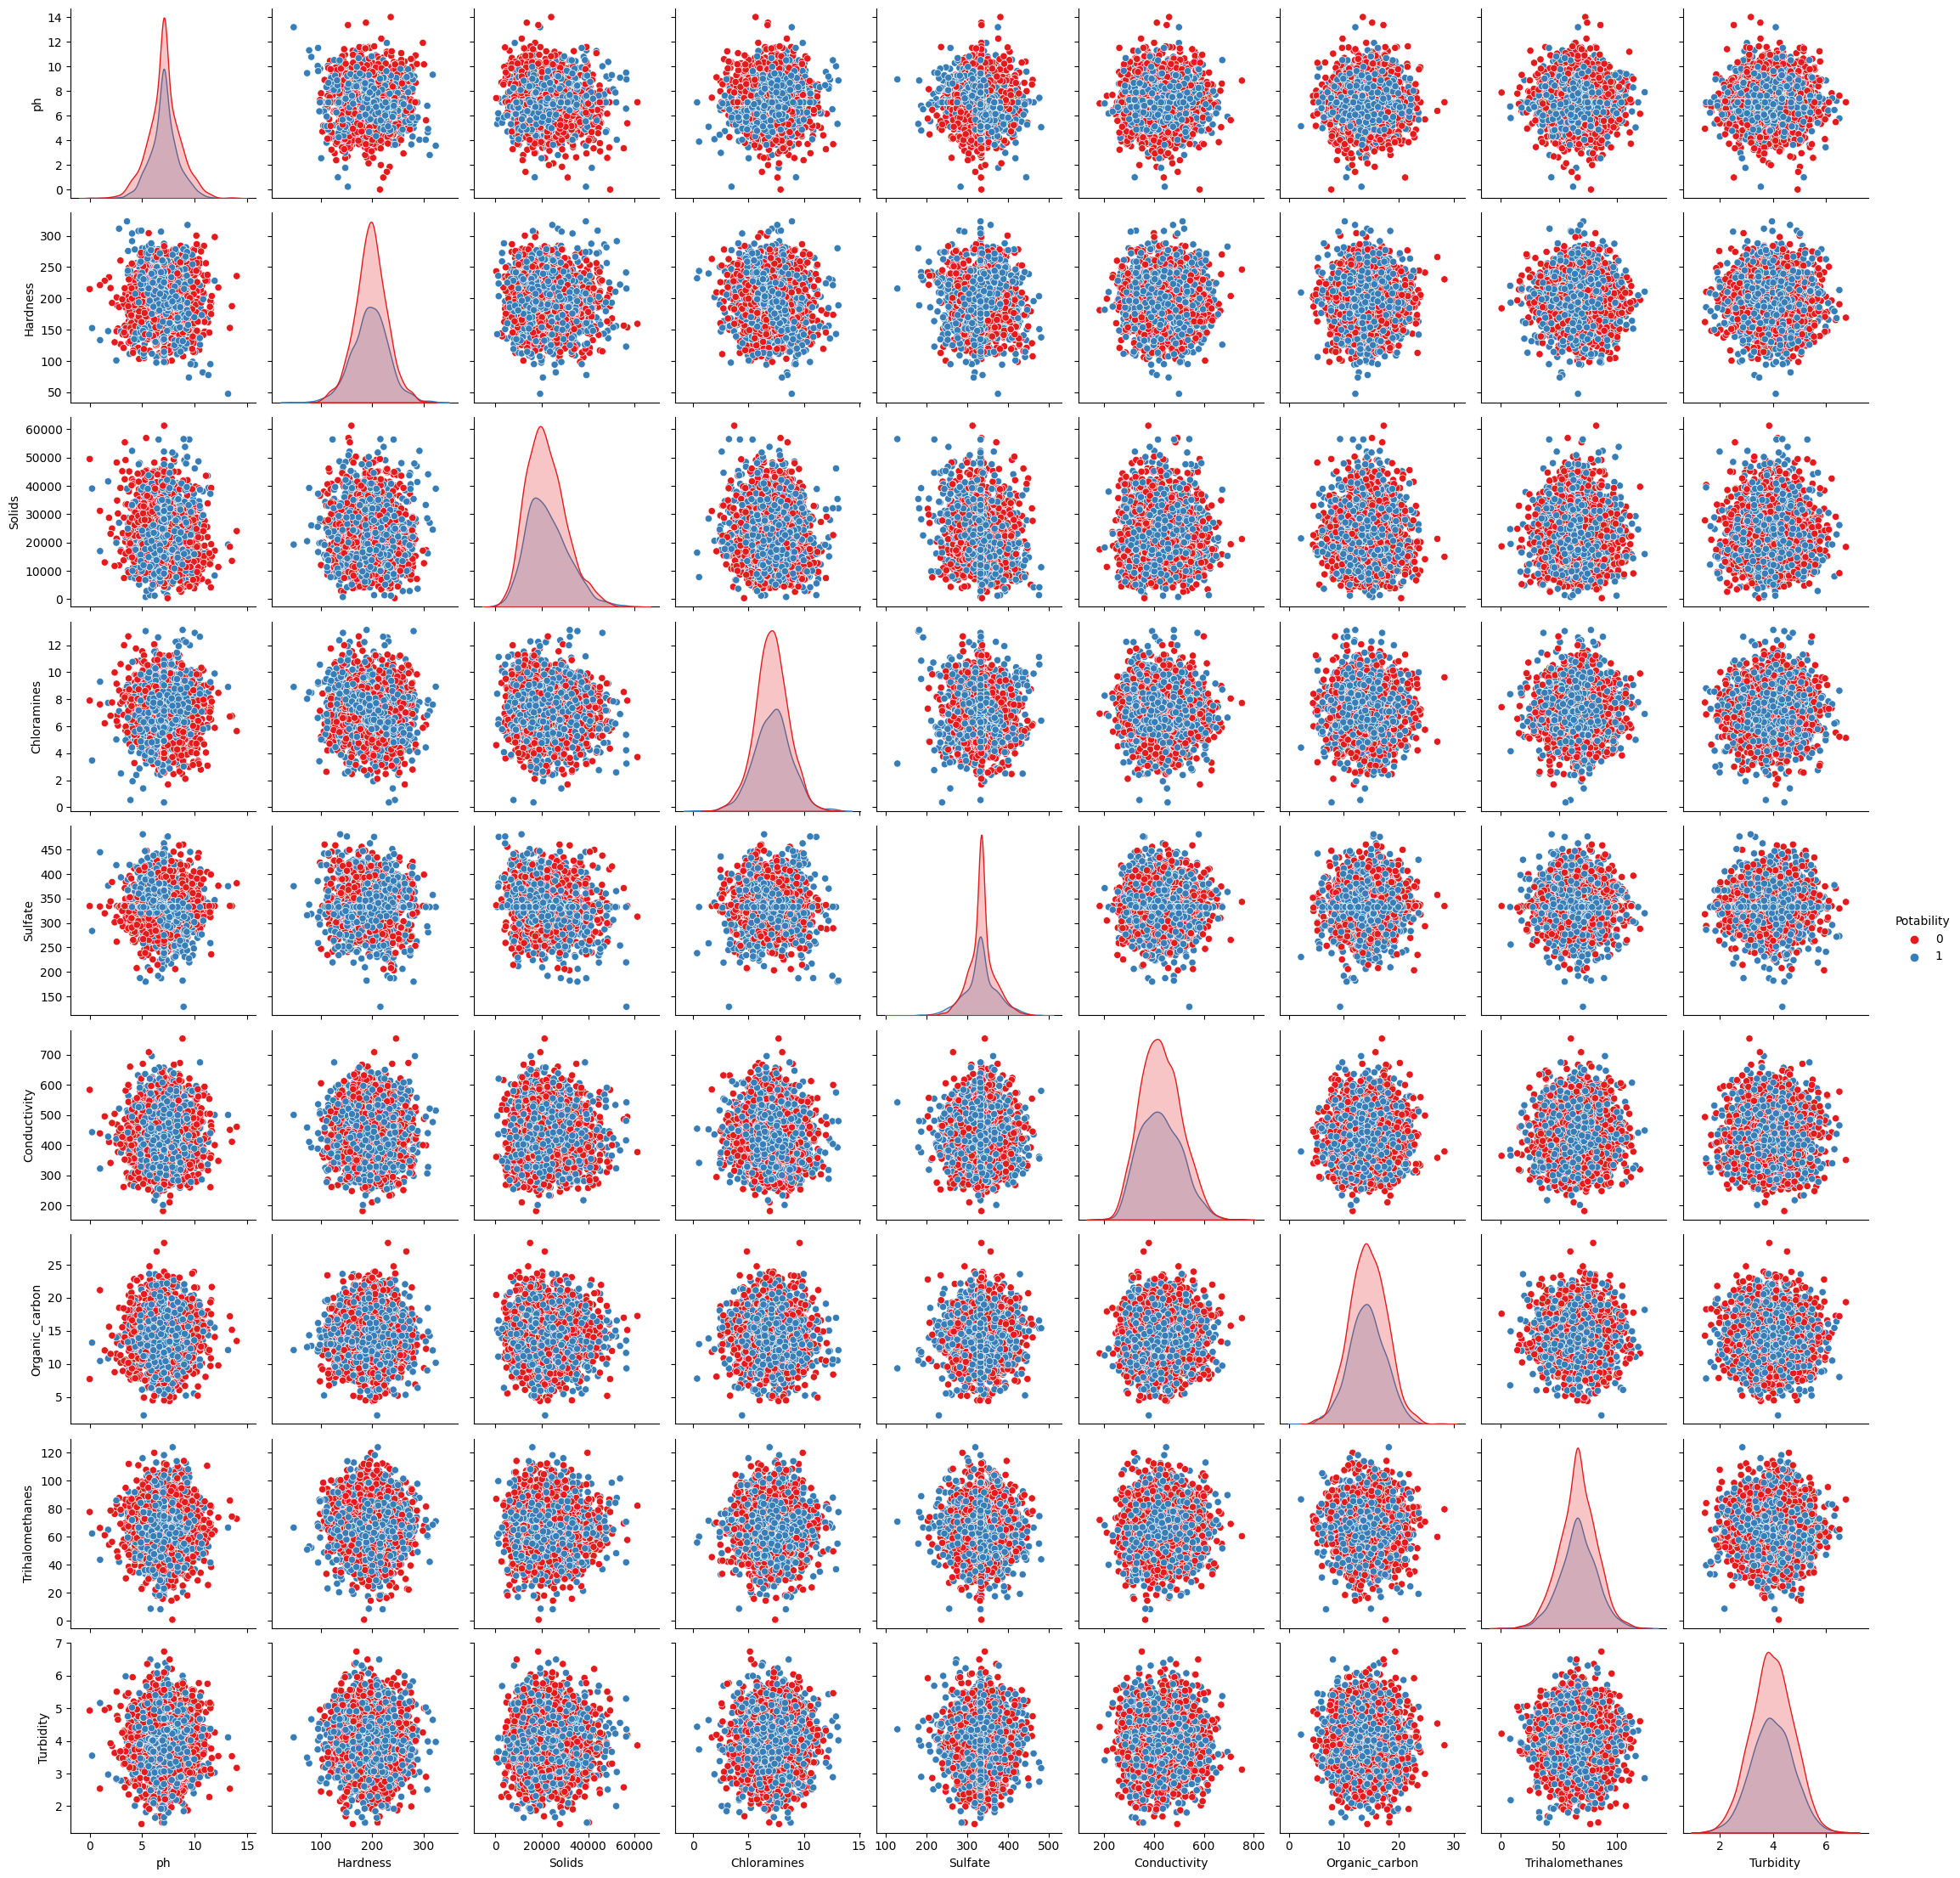

In [ ]:
sns.pairplot(data, hue='Potability', palette='Set1')

**IMPLEMENTING XGBOOSTER**

In [ ]:
X = data.drop('Potability', axis = 1).copy()
y = data['Potability'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.38)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

y_pred = model.predict(dtest)
y_pred_labels = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

Accuracy: 0.7991967871485943


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       763
           1       0.76      0.68      0.72       482

    accuracy                           0.80      1245
   macro avg       0.79      0.77      0.78      1245
weighted avg       0.79      0.80      0.79      1245



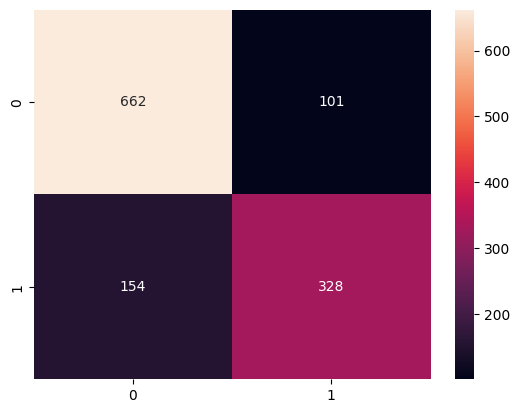

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_xgb = xgb.predict(X_test)
print(metrics.classification_report(y_test, y_xgb))

sns.heatmap(confusion_matrix(y_test, y_xgb), annot=True, fmt='d')
plt.show()

**IMPLEMENTING KERAS MODEL**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model2 = Sequential()
model2.add(Dense(350,input_dim=9, activation='relu'))
model2.add(Dense(350,activation='relu'))
model2.add(Dense(350,activation='relu'))
model2.add(Dense(1,activation='linear'))

In [ ]:
keras.optimizers.Adam(learning_rate=0.01)
model2.compile(loss='mean_squared_error',optimizer='Adam', metrics=['mse'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
normalized_data = scaler.transform(data)
original_data = scaler.inverse_transform(normalized_data)

In [ ]:
print(normalized_data)

[[0.50609846 0.57113901 0.33609646 ... 0.69975313 0.28609102 0.        ]
 [0.26543429 0.29740043 0.30061142 ... 0.4509993  0.57679264 0.        ]
 [0.57850887 0.64131081 0.32161885 ... 0.5328657  0.30363656 0.        ]
 ...
 [0.67282217 0.46548556 0.53910122 ... 0.56065454 0.34956996 1.        ]
 [0.36619735 0.66440723 0.19148981 ... 0.62265916 0.61611996 1.        ]
 [0.56247653 0.53563505 0.28048408 ... 0.63247754 0.16244074 1.        ]]


In [ ]:
scaled_X = normalized_data[:, :-1]
scaled_y = normalized_data[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
data_train,data_test,pred_train,pred_test = train_test_split(scaled_X,scaled_y,test_size=0.20,random_state=1)
pred_train.shape

(2620,)

In [ ]:
history = model2.fit(data_train, pred_train, epochs=300)

Epoch 1/300
82/82 [==============================] - 2s 7ms/step - loss: 0.2450 - mse: 0.2450
Epoch 2/300
82/82 [==============================] - 1s 7ms/step - loss: 0.2383 - mse: 0.2383
Epoch 3/300
82/82 [==============================] - 1s 7ms/step - loss: 0.2349 - mse: 0.2349
Epoch 4/300
82/82 [==============================] - 1s 7ms/step - loss: 0.2320 - mse: 0.2320
Epoch 5/300
82/82 [==============================] - 1s 7ms/step - loss: 0.2261 - mse: 0.2261
Epoch 6/300
82/82 [==============================] - 1s 6ms/step - loss: 0.2250 - mse: 0.2250
Epoch 7/300
82/82 [==============================] - 1s 7ms/step - loss: 0.2213 - mse: 0.2213
Epoch 8/300
82/82 [==============================] - 1s 6ms/step - loss: 0.2164 - mse: 0.2164
Epoch 9/300
82/82 [==============================] - 1s 7ms/step - loss: 0.2171 - mse: 0.2171
Epoch 10/300
82/82 [==============================] - 1s 7ms/step - loss: 0.2126 - mse: 0.2126
Epoch 11/300
82/82 [==============================] - 1s 7m

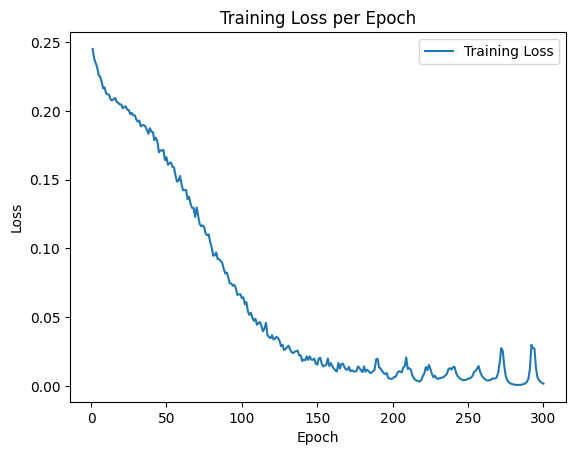

In [ ]:
train_loss = history.history['loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.show()

In [ ]:
prediction = model2.predict(data_train)

82/82 [==============================] - 1s 7ms/step


In [47]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
loss, accuracy = model2.evaluate(data_test, pred_test)
print('Accuracy:', accuracy)

21/21 [==============================] - 1s 6ms/step - loss: 0.7262 - accuracy: 0.6433
Accuracy: 0.6432926654815674
